In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Create data

In [2]:
spot_init=100

int_rate = 2/100
volatility=15/100
maturity=1
nb_step=12
time_step = maturity/nb_step
nb_path=20
nb_seed=20191008

In [3]:
drift_mod = (int_rate-0.5*volatility**2)*time_step
mat_drift = drift_mod*np.cumsum(np.ones((nb_path,nb_step)),axis=1)

In [4]:
volat_mod = volatility*np.sqrt(time_step)


In [5]:
np.random.seed(nb_seed)

In [6]:
mat_shock = np.random.standard_normal((nb_path,nb_step))

In [7]:
mat_shock_cum = np.cumsum(mat_shock,axis=1)

In [8]:
mat_volatility = volat_mod*mat_shock_cum

In [9]:
mat_volatility.shape

(20, 12)

In [10]:
mat_log_spot= mat_drift + mat_volatility


In [11]:
mat_spot_init = spot_init*np.ones((nb_path,nb_step))

In [12]:
mat_spot_fut = mat_spot_init*np.exp(mat_log_spot)

In [13]:
vec_spot_init = spot_init*np.ones((nb_path,1))

In [14]:
mat_path_spot_fut = np.concatenate((vec_spot_init,np.round(mat_spot_fut,3)),axis=1)

In [15]:
mat_path_spot_fut.shape

(20, 13)

In [16]:
mat_path_spot_fut

array([[100.   ,  96.217,  94.804,  92.972,  94.336, 100.207,  98.783,
        105.671, 114.904, 117.715, 108.745, 106.763, 101.06 ],
       [100.   , 100.255,  98.843,  96.419,  87.737,  88.071,  80.193,
         79.617,  72.863,  70.423,  71.093,  68.658,  72.335],
       [100.   ,  92.977,  93.2  ,  98.233,  96.448,  90.172,  96.604,
         99.474, 103.68 , 108.957, 115.239, 121.766, 120.964],
       [100.   , 103.328, 104.628, 103.017, 104.118, 104.356,  98.255,
         99.214,  97.686,  90.776,  87.869,  92.36 ,  98.698],
       [100.   ,  97.092,  87.424,  85.111,  84.29 ,  85.676,  79.933,
         85.14 ,  82.265,  85.025,  85.433,  84.65 ,  89.611],
       [100.   , 101.153, 100.056,  94.879,  94.155,  86.617,  88.317,
         87.081,  86.166,  85.632,  86.074,  88.473,  95.124],
       [100.   ,  98.82 ,  98.829,  95.025,  96.193,  95.001, 104.095,
        105.52 , 114.331, 111.126, 107.262, 111.02 , 116.898],
       [100.   , 102.279, 101.214, 103.897, 105.819, 102.648, 

In [17]:
def vol_maltz(strike, spot, int_rate, time_to_maturity):
    sigma0 = 0.15
    alpha1 = 0.58
    alpha2 = -0.35
    a = np.log(spot * np.exp(int_rate * time_to_maturity) / strike) / np.sqrt(time_to_maturity)
    vol = sigma0 + alpha1 * a + alpha2 * a**2
    return max(0.05, vol)
    

In [18]:
def psi(N, Ci):
    return 0.2 * 10**(-2) * N * Ci

In [19]:
def phi(Ci):
    return 0.5 * 10**(-2) * Ci

# Question 1

In [20]:
def call_price_t(spot, strike, int_rate, time_to_maturity):
    if time_to_maturity == 0:
        return(max(spot - strike, 0))
    else :
        exp_rate = np.exp(-int_rate * time_to_maturity)
        volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
        vol_mod = volatility*np.sqrt(time_to_maturity)
        d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
        d1 = d1 / vol_mod
        d2 = d1 - vol_mod
        Nd1 = norm.cdf(d1)
        Nd2 = norm.cdf(d2)
        price = spot * Nd1 - strike * exp_rate * Nd2
        return price
    

In [21]:
mat_call_price = np.zeros(((nb_path,nb_step + 1)))
mat_call_price.shape


(20, 13)

In [22]:
strike = spot_init

for j in range(mat_call_price.shape[0]):
    for t in range(mat_call_price.shape[1]):
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = nb_step - t
        mat_call_price[j,t] = call_price_t(spot, strike, int_rate,time_to_maturity)
        mat_call_price[j,t] = round(mat_call_price[j,t],2)


In [23]:
mat_call_price

array([[3.500e+01, 2.968e+01, 2.649e+01, 2.289e+01, 2.203e+01, 2.502e+01,
        2.143e+01, 2.505e+01, 3.073e+01, 3.033e+01, 1.883e+01, 1.315e+01,
        1.060e+00],
       [3.500e+01, 3.336e+01, 3.014e+01, 2.595e+01, 1.639e+01, 1.460e+01,
        6.610e+00, 4.360e+00, 3.300e-01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.500e+01, 2.676e+01, 2.506e+01, 2.757e+01, 2.389e+01, 1.633e+01,
        1.954e+01, 1.957e+01, 2.058e+01, 2.233e+01, 2.473e+01, 2.692e+01,
        2.096e+01],
       [3.500e+01, 3.620e+01, 3.544e+01, 3.191e+01, 3.078e+01, 2.875e+01,
        2.097e+01, 1.934e+01, 1.540e+01, 7.170e+00, 2.600e+00, 2.080e+00,
        0.000e+00],
       [3.500e+01, 3.047e+01, 2.001e+01, 1.617e+01, 1.357e+01, 1.267e+01,
        6.440e+00, 8.000e+00, 3.970e+00, 3.420e+00, 1.440e+00, 1.000e-02,
        0.000e+00],
       [3.500e+01, 3.419e+01, 3.124e+01, 2.458e+01, 2.187e+01, 1.342e+01,
        1.263e+01, 9.420e+00, 6.450e+00, 3.770e+00, 1.710e+00, 4.700e-01,
        0.00

# Question 2

In [25]:
mat_call_price.shape

(20, 13)

In [26]:
N = 10000
pnl_wo_cov = np.zeros(nb_path)
for i in range(nb_path):
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0])
    b = [b0]
    pnl_wo_cov[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0
    for j in range(1, 12):
        bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[-1]
        b.append(bm)
        pnl_wo_cov[i] += int_rate * time_step * bm
    if strike < mat_path_spot_fut[i,-1]:
        pnl_wo_cov[i] -= (phi(N  * strike) + N * mat_path_spot_fut[i,-1] + phi(N * mat_path_spot_fut[i,-1]))
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)
    else:
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)

In [27]:
pnl_wo_cov

array([ -680305.25,   351167.45, -1079570.11,   351132.71,   351167.24,
         351159.56,  -997940.61,  -665691.28,   351107.31,   350941.11,
         351167.44,   351167.45,   351164.62,   351074.54,   351167.42,
       -1053450.48,  -936420.57,  -703469.43,  -772563.79, -1183658.35])

# Question 3

In [28]:
def delta( time_to_maturity, spot ):
    if time_to_maturity == 0:
        if spot > strike:
            return 1
        else: 
            return 0
    else :
        volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
        vol_mod = volatility*np.sqrt(time_to_maturity)
        d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
        d1 = d1 / vol_mod
        Nd1 = norm.cdf(d1)
        return Nd1

In [44]:
mat_delta = np.zeros((nb_path,nb_step +1))
mat_delta.shape

(20, 13)

In [45]:
mat_path_spot_fut.shape

(20, 13)

In [46]:
strike = spot_init

for j in range(mat_delta.shape[0]):
    for t in range(mat_delta.shape[1] ):
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = nb_step - t
        mat_delta[j,t] = delta(time_to_maturity, spot)
        mat_delta[j,t] = round(mat_delta[j,t],3)
mat_delta

array([[0.756, 0.727, 0.706, 0.679, 0.674, 0.704, 0.679, 0.719, 0.768,
        0.782, 0.72 , 0.703, 1.   ],
       [0.756, 0.748, 0.731, 0.704, 0.613, 0.593, 0.431, 0.357, 0.071,
        0.   , 0.   , 0.   , 0.   ],
       [0.756, 0.707, 0.695, 0.716, 0.691, 0.617, 0.66 , 0.669, 0.692,
        0.725, 0.771, 0.833, 1.   ],
       [0.756, 0.763, 0.76 , 0.743, 0.74 , 0.731, 0.675, 0.667, 0.632,
        0.486, 0.314, 0.322, 0.   ],
       [0.756, 0.732, 0.65 , 0.607, 0.573, 0.562, 0.426, 0.479, 0.351,
        0.339, 0.222, 0.006, 0.   ],
       [0.756, 0.753, 0.737, 0.693, 0.673, 0.575, 0.568, 0.514, 0.446,
        0.357, 0.247, 0.128, 0.   ],
       [0.756, 0.741, 0.731, 0.694, 0.689, 0.663, 0.719, 0.718, 0.765,
        0.741, 0.705, 0.753, 1.   ],
       [0.756, 0.758, 0.744, 0.748, 0.749, 0.72 , 0.699, 0.611, 0.619,
        0.644, 0.582, 0.396, 1.   ],
       [0.756, 0.712, 0.718, 0.7  , 0.666, 0.636, 0.707, 0.688, 0.606,
        0.462, 0.435, 0.427, 0.   ],
       [0.756, 0.737, 0.767,

# Question 4

In [47]:
mat_delta.shape

(20, 13)

In [48]:
mat_titre = np.zeros((nb_path,nb_step+1))

for t in range( nb_step+1):
    mat_titre[:,t] = N * mat_delta[:,t]
    mat_titre[:,t] = np.round(mat_titre[:,t], 0)

mat_titre

array([[ 7560.,  7270.,  7060.,  6790.,  6740.,  7040.,  6790.,  7190.,
         7680.,  7820.,  7200.,  7030., 10000.],
       [ 7560.,  7480.,  7310.,  7040.,  6130.,  5930.,  4310.,  3570.,
          710.,     0.,     0.,     0.,     0.],
       [ 7560.,  7070.,  6950.,  7160.,  6910.,  6170.,  6600.,  6690.,
         6920.,  7250.,  7710.,  8330., 10000.],
       [ 7560.,  7630.,  7600.,  7430.,  7400.,  7310.,  6750.,  6670.,
         6320.,  4860.,  3140.,  3220.,     0.],
       [ 7560.,  7320.,  6500.,  6070.,  5730.,  5620.,  4260.,  4790.,
         3510.,  3390.,  2220.,    60.,     0.],
       [ 7560.,  7530.,  7370.,  6930.,  6730.,  5750.,  5680.,  5140.,
         4460.,  3570.,  2470.,  1280.,     0.],
       [ 7560.,  7410.,  7310.,  6940.,  6890.,  6630.,  7190.,  7180.,
         7650.,  7410.,  7050.,  7530., 10000.],
       [ 7560.,  7580.,  7440.,  7480.,  7490.,  7200.,  6990.,  6110.,
         6190.,  6440.,  5820.,  3960., 10000.],
       [ 7560.,  7120.,  7180., 

# Question 5

In [49]:
pnl_covered = np.zeros(nb_path)

In [50]:
for i in range(nb_path):
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0]) - (mat_titre[i,0] * mat_path_spot_fut[i,0] + phi(mat_titre[i,0] * mat_path_spot_fut[i,0]))
    b = [b0]
    pnl_covered[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0 + mat_titre[i,0] * (mat_path_spot_fut[i,1] - mat_path_spot_fut[i,0])
    for j in range(1, 12):
        bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[-1] +  mat_titre[i,j-1] * (mat_path_spot_fut[i,j] - mat_path_spot_fut[i,j-1])
        bm += (mat_path_spot_fut[i,j] * ( mat_titre[i,j-1] -  mat_titre[i,j]) - phi(np.abs(mat_titre[i,j-1] -  mat_titre[i,j]) * mat_path_spot_fut[i,j] ))
        b.append(bm)
        pnl_covered[i] += (int_rate * time_step * bm + mat_titre[i,j] * (mat_path_spot_fut[i,j+1] - mat_path_spot_fut[i,j]))
    if strike < mat_path_spot_fut[i,-1]:
        pnl_covered[i] -= (phi(N  * strike) + ( N - mat_titre[i,-2])  * mat_path_spot_fut[i,-1] + phi((N - mat_titre[i,-2]) * mat_path_spot_fut[i,-1]))
        pnl_covered[i] = round(pnl_covered[i], 2)
    else :
        pnl_covered[i] -= phi( mat_titre[i,-2] * mat_path_spot_fut[i,-1])
        pnl_covered[i] = round(pnl_covered[i], 2)
                          
                        

In [51]:
pnl_covered

array([ 2.9797960e+04,  1.9014983e+05,  7.1667960e+04,  3.1001025e+05,
        2.3165510e+05,  2.6828932e+05,  1.7137000e+02, -2.8226168e+05,
        2.7714072e+05,  3.4111035e+05,  2.2280230e+05,  1.9881422e+05,
        2.7186271e+05,  3.1940037e+05,  2.2846671e+05,  6.0449730e+04,
        3.4471020e+04, -1.6865875e+05,  3.9223570e+04, -3.5599620e+04])

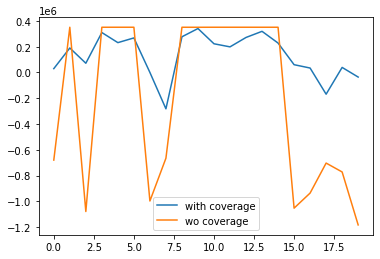

In [52]:
plt.figure()
plt.plot(pnl_covered)
plt.plot(pnl_wo_cov)
plt.legend(['with coverage','wo coverage'])


# Question 6